In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn.datasets import make_blobs,make_circles ,make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
#!pip install plotnine

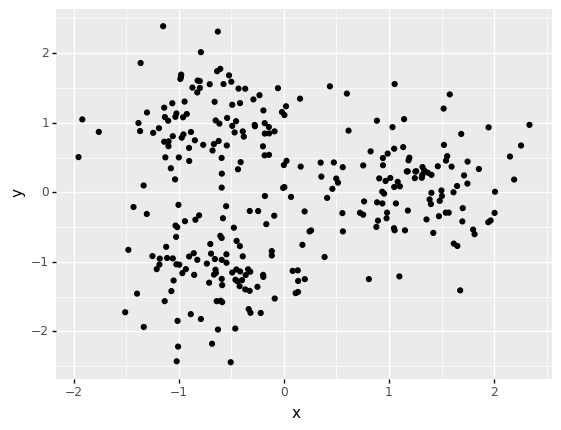

<ggplot: (-9223371894342637072)>

In [3]:
n_samples = 1500
dataset1 = make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0],columns=["x","y"])
dataset2 = make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0],columns=["x","y"])

dataset3 = make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0],columns=["x","y"])

dataset4= np.random.rand(n_samples, 2)
dataset4=pd.DataFrame(dataset4,columns=["x","y"])

dataset5= pd.read_csv("data/dataset5.csv",header=None,names=["x","y"])
dataset6= pd.read_csv("data/dataset6.csv",header=None,names=["x","y"])
dataset7= pd.read_csv("data/dataset7.csv",header=None,names=["x","y"])
dataset8= pd.read_csv("data/dataset8.csv")
dataset9= pd.read_csv("data/dataset9.csv")
datasets=[dataset1]
z = StandardScaler()
#dataset6[["x","y"]] = z.fit_transform(dataset6)
ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


# Dataset1

In [4]:
dataset1.head()

,x,y
0,0.794409,0.657810
1,-0.946465,0.387377
2,-0.207814,0.463742
3,-0.663892,-0.717453
4,-0.817444,0.596654


In [5]:

dataset1[["x","y"]]=StandardScaler().fit_transform(dataset1)
dataset1.head()

,x,y
0,1.406370,1.173682
1,-1.682977,0.692160
2,-0.372170,0.828132
3,-1.181524,-1.275059
4,-1.454016,1.064791


## DBSCAN

db1.labels_ = 
 [0 0 1 ... 0 0 0]
db1 = 
 DBSCAN(eps=0.2, min_samples=15)


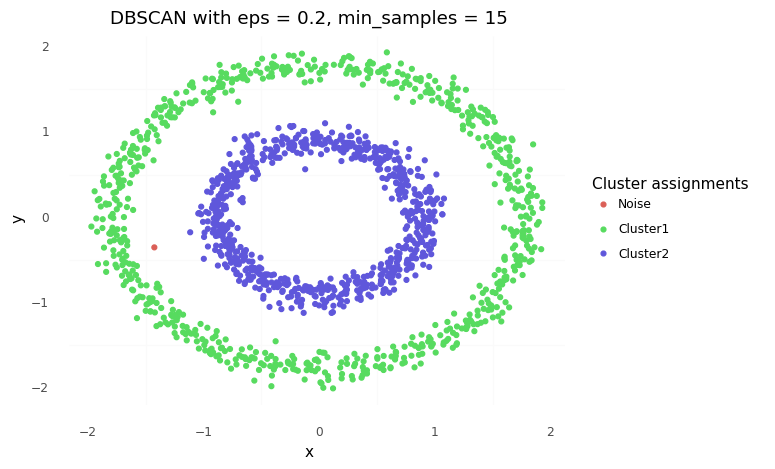

<ggplot: (-9223371894342439024)>

In [6]:
db1 = DBSCAN(eps=0.2, min_samples=15).fit(dataset1)
print("db1.labels_ = \n",db1.labels_)
print("db1 = \n",db1)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db1.labels_)))]
dataset1c=dataset1.copy()
dataset1c["assignments"] = db1.labels_

ggplot(dataset1c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.2, min_samples = 15")

In [7]:
# running the algorith with dif number of clusters and linkage single

print(silhouette_score(dataset1,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset1)))


-0.08222548904722107


## Kmeans

In [8]:
def plot_elbow(dataset):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.plot(range(1, 11), wcss,".r")
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


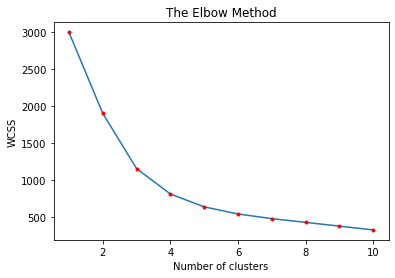

In [9]:
plot_elbow(dataset1)

In [10]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1)
X = dataset1.iloc[:, [0, 1]].values

In [11]:
X = dataset1.iloc[:, [0, 1]].values

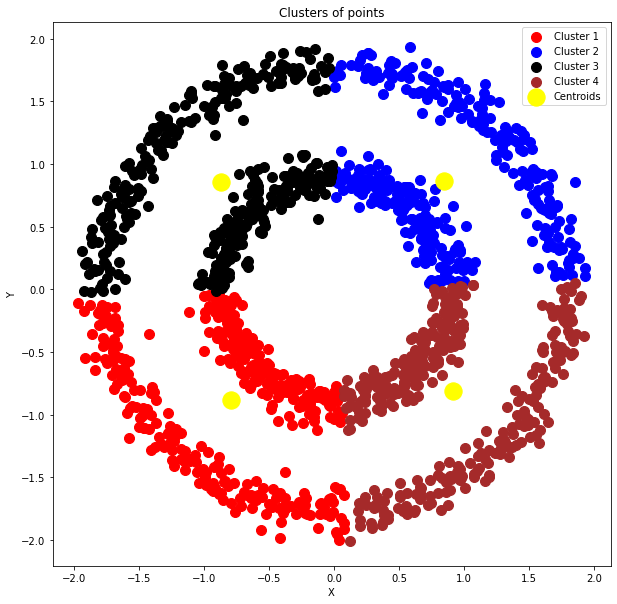

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
def plothier(X,y_hc):
    plt.figure(figsize=(10,10))
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
    plt.title('Clusters of points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [14]:
def plotkmeans(X,y_hc):
    plt.figure(figsize=(10,10))
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [15]:
def plot_silhouettek(dataset):
    scores=[]

    for i in range(2,11):
        scores.append(silhouette_score(dataset1,KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit_predict(dataset)))
    plt.plot(range(2,11),scores) 
    plt.plot(range(2,11),scores,'.r')
    plt.xlabel("number of clusters")
    plt.ylabel("silhoutte scoe")

Text(0, 0.5, 'silhoutte scoe')

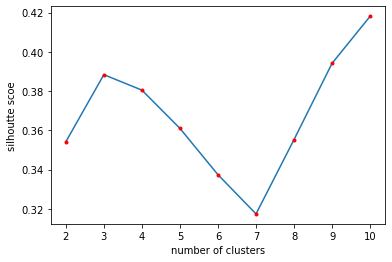

In [16]:
# running the algorith with dif number of clusters and linkage single
scores=[]

for i in range(2,11):
    scores.append(silhouette_score(dataset1,KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit_predict(dataset1)))
plt.plot(range(2,11),scores) 
plt.plot(range(2,11),scores,'.r')
plt.xlabel("number of clusters")
plt.ylabel("silhoutte scoe")

## Hiercheral Clustering

In [17]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


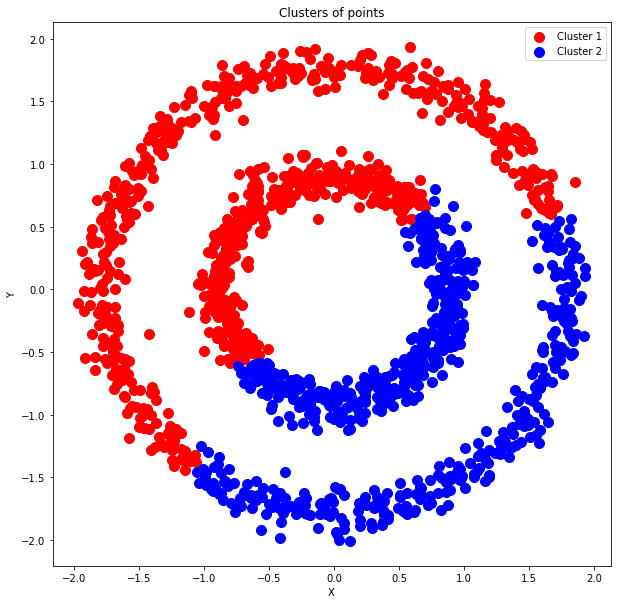

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [19]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

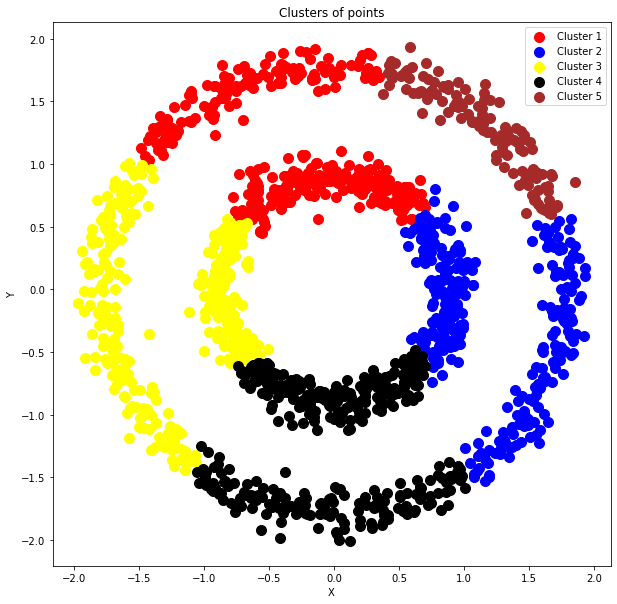

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [21]:
print(silhouette_score(dataset1,AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset1)))

0.3479655293858536


## Conclusion 

the alogorithm(hiercheral and kmeans) work bad for this data (whether cluster=2 /5 ) Dbscan works best

# Dataset 2

In [22]:
dataset2.head()

,x,y
0,0.985729,0.315740
1,1.482378,-0.376514
2,-0.779364,0.581794
3,0.546517,-0.468808
4,0.062588,0.983746


In [23]:
dataset2[["x","y"]]=StandardScaler().fit_transform(dataset2)
dataset2.head()

,x,y
0,0.559160,0.133181
1,1.132070,-1.261643
2,-1.476964,0.669254
3,0.052507,-1.447605
4,-0.505730,1.479147


## DBSCAN

db1.labels_ = 
 [0 1 0 ... 0 0 0]
db1 = 
 DBSCAN(eps=0.2, min_samples=15)


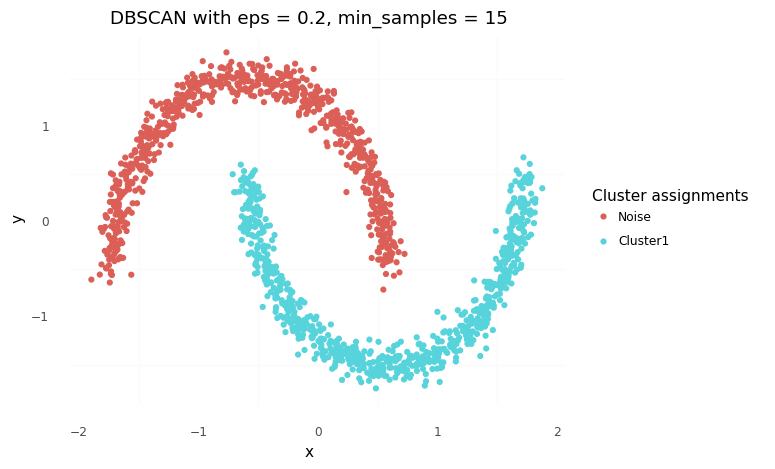

<ggplot: (-9223371894340547716)>

In [24]:
db2 = DBSCAN(eps=0.2, min_samples=15).fit(dataset2)
print("db1.labels_ = \n",db2.labels_)
print("db1 = \n",db2)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db2.labels_)))]
dataset2c=dataset2.copy()
dataset2c["assignments"] = db2.labels_

ggplot(dataset2c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.2, min_samples = 15")

In [25]:
print(silhouette_score(dataset2,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset2)))


0.39387174567082606


## Kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


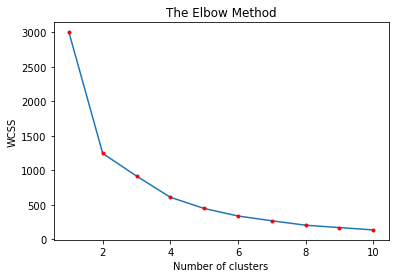

In [26]:
plot_elbow(dataset2)

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(dataset2)
X2 = dataset2.iloc[:, [0, 1]].values

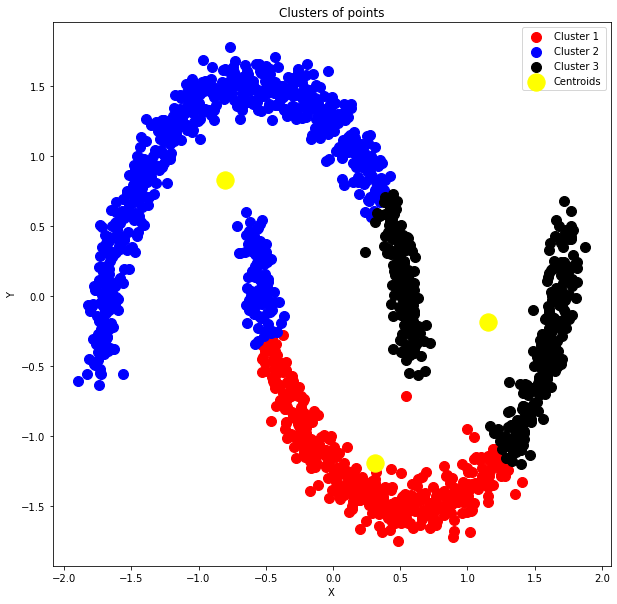

In [28]:
plotkmeans(X2,y_kmeans2)

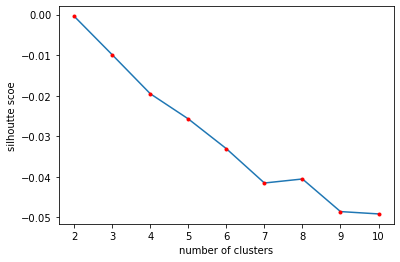

In [29]:
plot_silhouettek(dataset2)

## Hiercheral Clustering

In [30]:
dataset2.head()

,x,y
0,0.559160,0.133181
1,1.132070,-1.261643
2,-1.476964,0.669254
3,0.052507,-1.447605
4,-0.505730,1.479147


In [31]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc.fit_predict(X2)

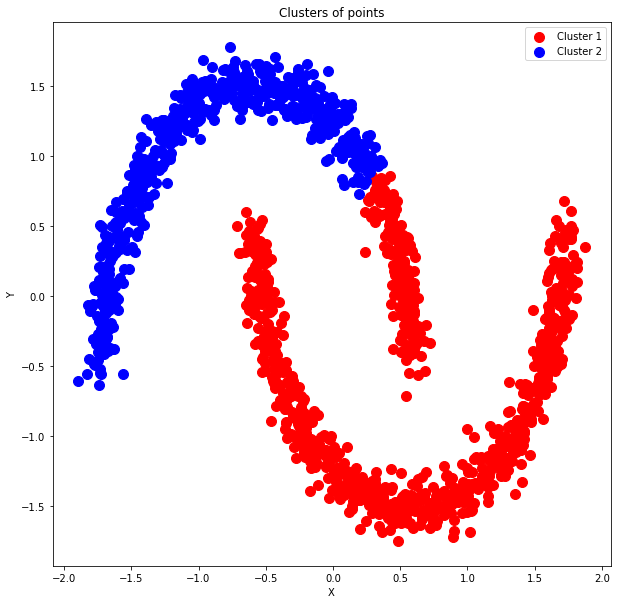

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(X2[y_hc2 == 0, 0], X2[y_hc2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_hc2 == 1, 0], X2[y_hc2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [33]:
print(silhouette_score(dataset2,AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset2)))

0.449742044243932


## Conclusion

DBSCAN works best for this data as it is spherical kmeans and hiercheral dont work

# Dataset 3

In [34]:
dataset3.head()

,x,y
0,5.867498,8.177152
1,5.613700,9.932955
2,7.225084,10.448862
3,6.762823,0.605145
4,8.016182,1.543147


In [35]:
dataset3[["x","y"]]=StandardScaler().fit_transform(dataset3)
dataset3.head()

,x,y
0,0.438685,1.018943
1,0.397074,1.240420
2,0.661271,1.305497
3,0.585480,0.063811
4,0.790976,0.182130


## DBSCAN

db3.labels_ = 
 [0 0 0 ... 0 2 2]
db3 = 
 DBSCAN(eps=0.2, min_samples=15)


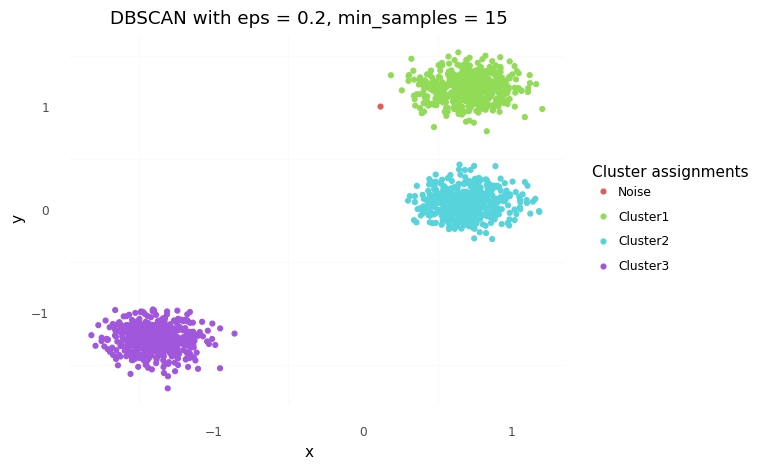

<ggplot: (-9223371894340306724)>

In [36]:
db3 = DBSCAN(eps=0.2, min_samples=15).fit(dataset3)
print("db3.labels_ = \n",db3.labels_)
print("db3 = \n",db3)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db3.labels_)))]
dataset3c=dataset3.copy()
dataset3c["assignments"] = db3.labels_

ggplot(dataset3c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.2, min_samples = 15")

In [37]:
print(silhouette_score(dataset3,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset3)))

0.7312387192978403


## Kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


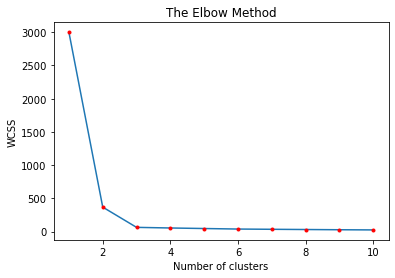

In [38]:
plot_elbow(dataset3)

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans.fit_predict(dataset3)
X3 = dataset3.iloc[:, [0, 1]].values


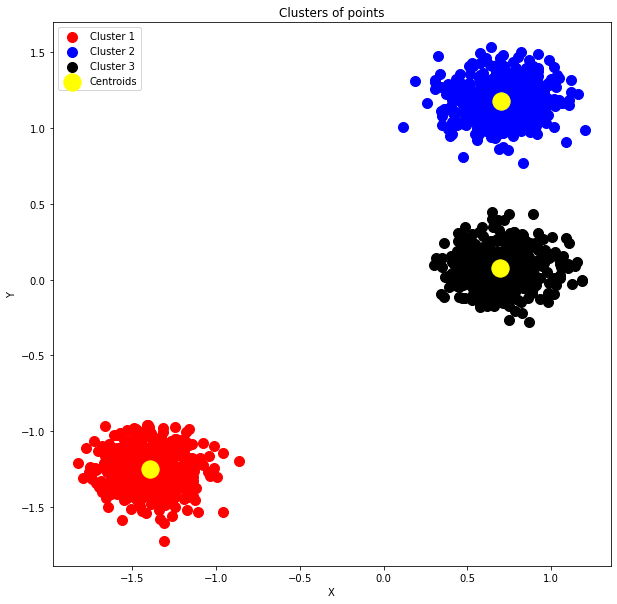

In [40]:
#this function plot kmeans with nclusters=3
plotkmeans(X3,y_kmeans3)

In [41]:
print(silhouette_score(dataset3, KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset3)))

0.8104321767519068


## Hiercheral Clustering

In [42]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc.fit_predict(X3)
#plothier(X3,y_hc3)


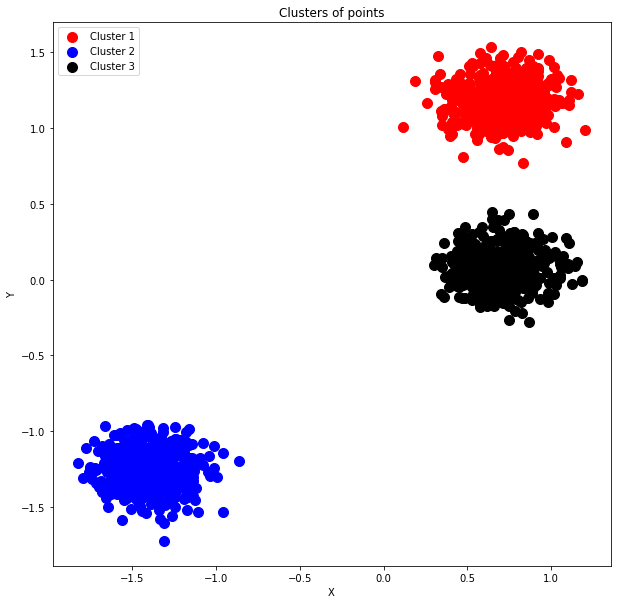

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(X3[y_hc3 == 0, 0], X3[y_hc3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_hc3 == 1, 0], X3[y_hc3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X3[y_hc3 == 2, 0], X3[y_hc3 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [44]:
print(silhouette_score(dataset3,AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset3)))


0.8104321767519068


## Conclusion

the 3 algorithms work fine for this data with n_clusters =3 also silhouette score is good

# Dataset 4

In [45]:
dataset4.head()

,x,y
0,0.859831,0.616972
1,0.875876,0.402493
2,0.158266,0.519001
3,0.581715,0.197467
4,0.453838,0.850769


In [46]:
dataset4[["x","y"]]=StandardScaler().fit_transform(dataset4)
dataset4.head()

,x,y
0,1.253551,0.383029
1,1.309599,-0.344762
2,-1.197212,0.050586
3,0.282013,-1.040479
4,-0.164696,1.176373


## Dbscan

In [47]:
dataset4.head()

,x,y
0,1.253551,0.383029
1,1.309599,-0.344762
2,-1.197212,0.050586
3,0.282013,-1.040479
4,-0.164696,1.176373


db4.labels_ = 
 [0 0 0 ... 0 0 0]
db4 = 
 DBSCAN(eps=0.7, min_samples=15)


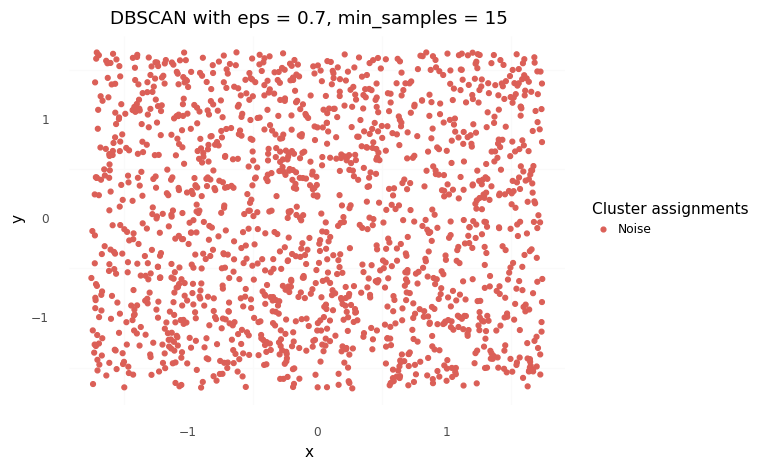

<ggplot: (-9223371894340691816)>

In [48]:
db4 = DBSCAN(eps=0.7, min_samples=15).fit(dataset4)
print("db4.labels_ = \n",db4.labels_)
print("db4 = \n",db4)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db4.labels_)))]
dataset4c=dataset4.copy()
dataset4c["assignments"] = db4.labels_

ggplot(dataset4c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.7, min_samples = 15")

#print(silhouette_score(dataset3,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset3)))

db4.labels_ = 
 [0 0 0 ... 0 0 0]
db4 = 
 DBSCAN(eps=0.2, min_samples=15)


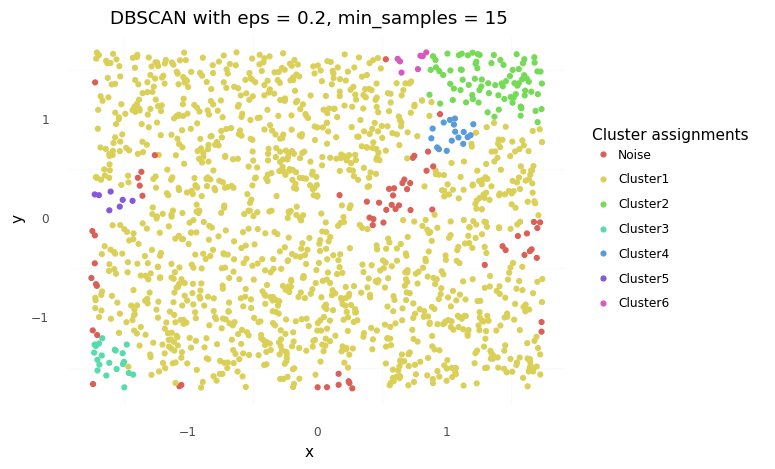

<ggplot: (-9223371894340585740)>

In [49]:
db4 = DBSCAN(eps=0.2, min_samples=15).fit(dataset4)
print("db4.labels_ = \n",db4.labels_)
print("db4 = \n",db4)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db4.labels_)))]
dataset4c=dataset4.copy()
dataset4c["assignments"] = db4.labels_

ggplot(dataset4c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.2, min_samples = 15")


db4.labels_ = 
 [0 0 0 ... 0 0 0]
db4 = 
 DBSCAN(eps=0.4, min_samples=15)


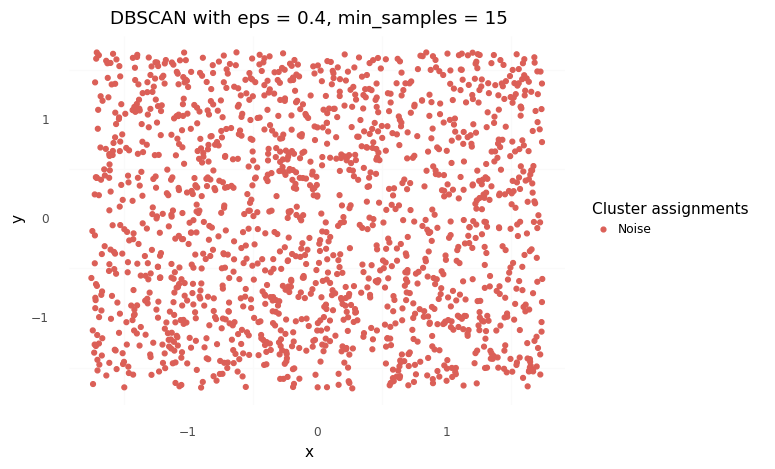

<ggplot: (-9223371894342290608)>

In [50]:
db4 = DBSCAN(eps=0.4, min_samples=15).fit(dataset4)
print("db4.labels_ = \n",db4.labels_)
print("db4 = \n",db4)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db4.labels_)))]
dataset4c=dataset4.copy()
dataset4c["assignments"] = db4.labels_

ggplot(dataset4c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.4, min_samples = 15")

In [51]:
print(silhouette_score(dataset4,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset4)))

-0.27534086654193657


In [52]:
# decreasing epsilon leads to better results but overall debscan gives bad results

## kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


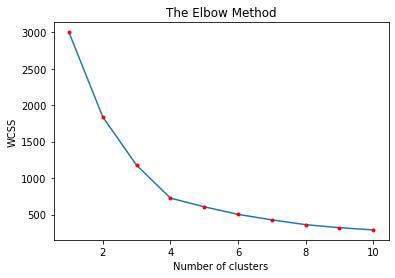

In [53]:
plot_elbow(dataset4)

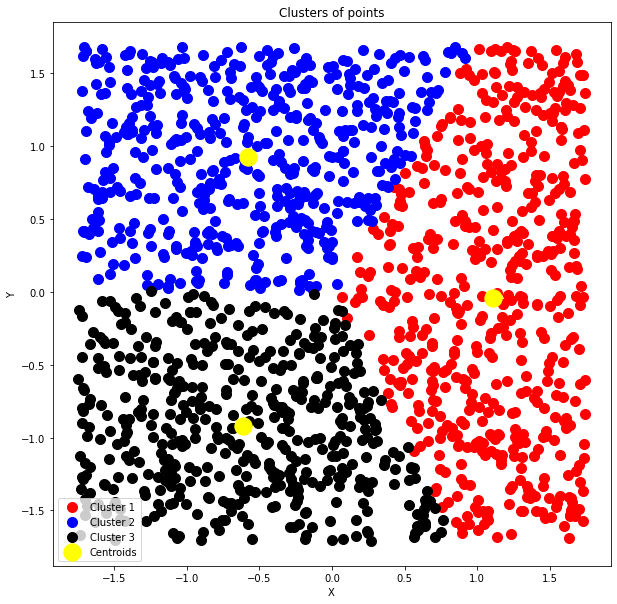

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans4 = kmeans.fit_predict(dataset4)
X4 = dataset4.iloc[:, [0, 1]].values
#more code
plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,10))
plt.scatter(X4[y_kmeans4 == 0, 0], X4[y_kmeans4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X4[y_kmeans4 == 1, 0], X4[y_kmeans4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X4[y_kmeans4 == 2, 0], X4[y_kmeans4 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
#print(silhouette_score(dataset5,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset5)))



In [55]:
# the kmeans gave better results at c=3 and the same for elbow curve

In [56]:
print(silhouette_score(dataset4,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset4)))

0.38355283460717843


## Hiercheral clustering

In [57]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc4 = hc.fit_predict(X4)

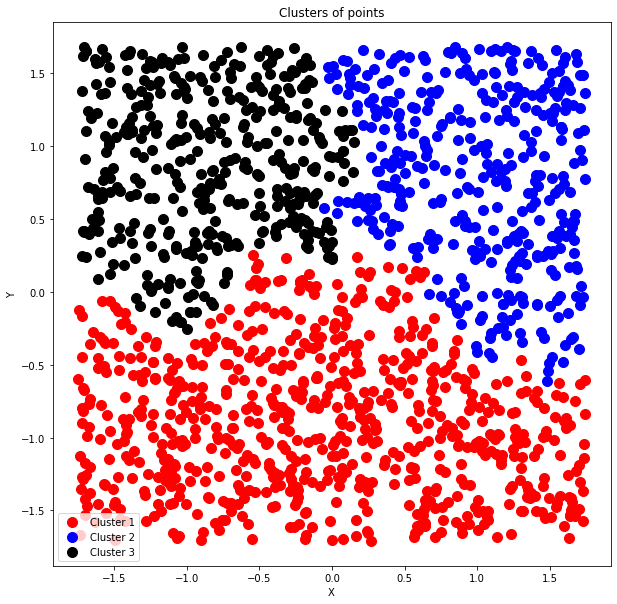

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(X4[y_hc4 == 0, 0], X4[y_hc4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X4[y_hc4 == 1, 0], X4[y_hc4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X4[y_hc4 == 2, 0], X4[y_hc4 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Conclusion

the hiercherchral and kmeans gave good results for clusters=3

# Dataset 5

In [59]:
dataset5[["x","y"]]=StandardScaler().fit_transform(dataset5)
dataset5.head()

,x,y
0,1.209113,1.852323
1,0.352802,0.246308
2,1.204704,0.632357
3,0.735551,1.367752
4,1.153633,0.726711


## DBSCAN

db5.labels_ = 
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0]
db5 = 
 DBSCAN(min_samples=15)


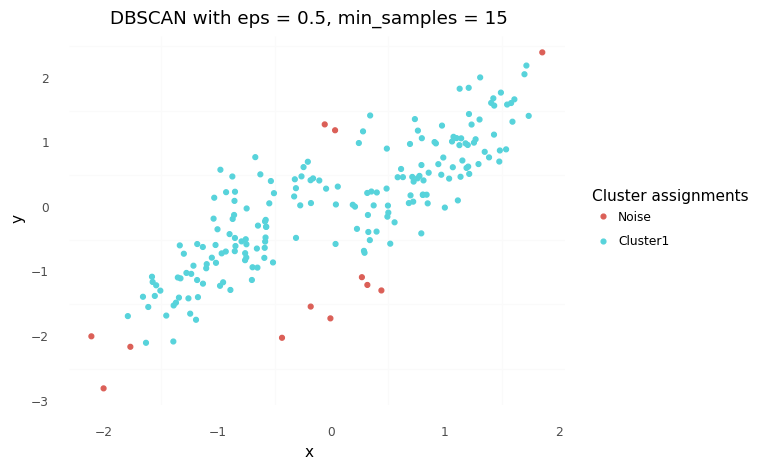

<ggplot: (-9223371894342279276)>

In [60]:
db5 = DBSCAN(eps=0.5, min_samples=15).fit(dataset5)
print("db5.labels_ = \n",db5.labels_)
print("db5 = \n",db5)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db5.labels_)))]
dataset5c=dataset5.copy()
dataset5c["assignments"] = db5.labels_

ggplot(dataset5c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.5, min_samples = 15")

In [61]:
print(silhouette_score(dataset5,DBSCAN(eps=0.5, min_samples=15).fit_predict(dataset5)))

0.251978943230589


## kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


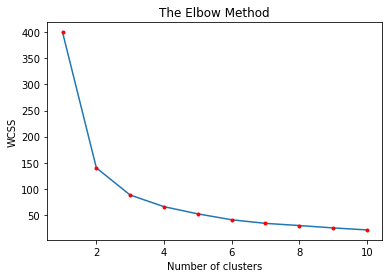

In [62]:
plot_elbow(dataset5)


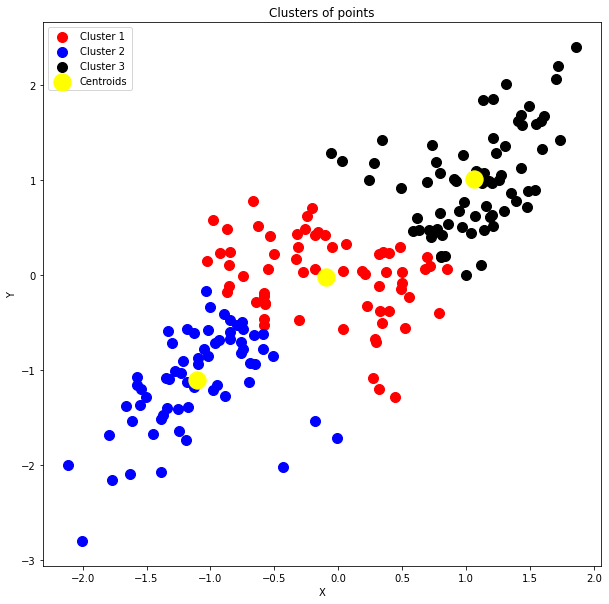

In [63]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans5 = kmeans.fit_predict(dataset5)
X5 = dataset5.iloc[:, [0, 1]].values
plotkmeans(X5,y_kmeans5)

In [64]:
print(silhouette_score(dataset5,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset5)))


0.43926726817109374


## Hiercheral clustering

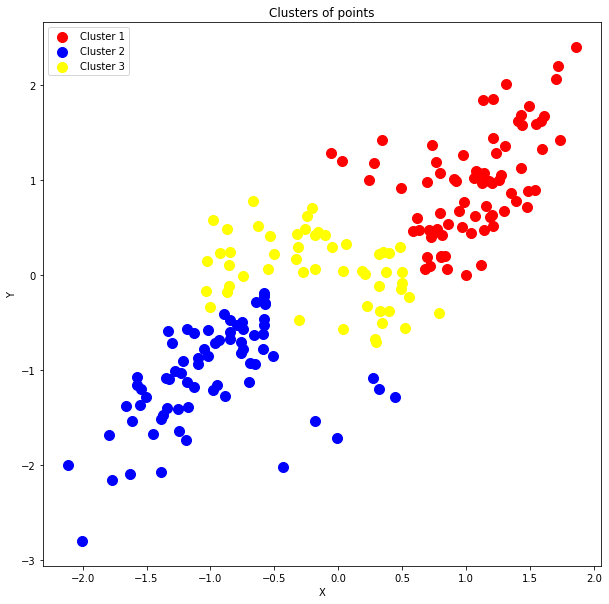

In [65]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc5 = hc.fit_predict(X5)
plt.figure(figsize=(10,10))
plt.scatter(X5[y_hc5 == 0, 0], X5[y_hc5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X5[y_hc5 == 1, 0], X5[y_hc5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X5[y_hc5 == 2, 0], X5[y_hc5 == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X6[y_hc6 == 3, 0], X6[y_hc6 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X6[y_hc6 == 4, 0], X6[y_hc6 == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [66]:
print(silhouette_score(dataset5,AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset5)))

0.3436516201956319


## Conclusion

In [67]:
#the kmeans and hiercheral works best for this data

# Dataset 6

In [68]:
dataset6[["x","y"]]=StandardScaler().fit_transform(dataset6)
dataset6.head()

,x,y
0,1.581164,1.410464
1,1.751127,0.442654
2,1.525696,0.682659
3,1.321153,0.363577
4,0.978797,-0.374213


## DBSCAN

db6.labels_ = 
 [-1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  0
  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0]
db6 = 
 DBSCAN(min_samples=15)


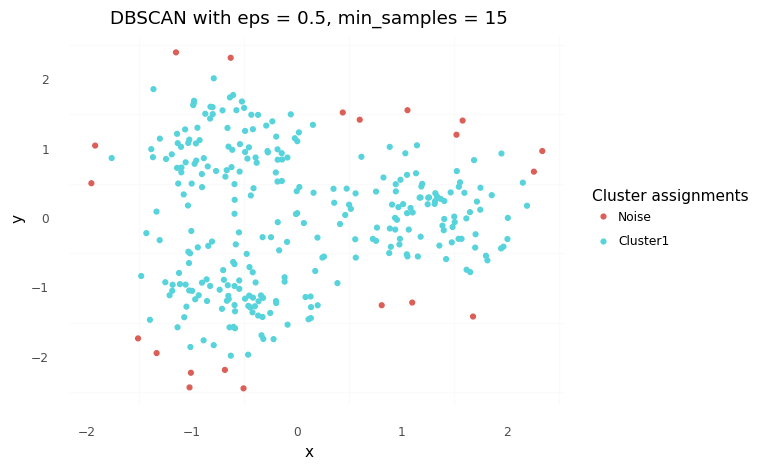

<ggplot: (-9223371894347541888)>

In [69]:
db6 = DBSCAN(eps=0.5, min_samples=15).fit(dataset6)
print("db6.labels_ = \n",db6.labels_)
print("db6 = \n",db6)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db6.labels_)))]
dataset6c=dataset6.copy()
dataset6c["assignments"] = db6.labels_

ggplot(dataset6c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.5, min_samples = 15")


In [70]:
print(silhouette_score(dataset6,DBSCAN(eps=0.5, min_samples=15).fit_predict(dataset6)))

0.258069565131939


## Kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


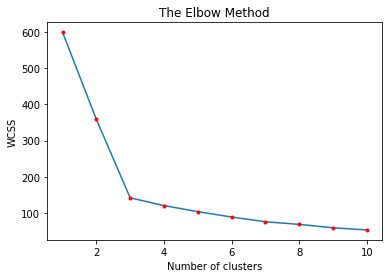

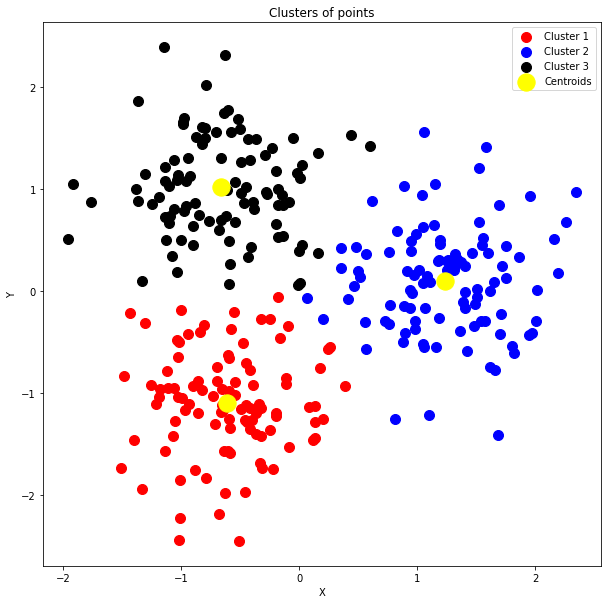

In [71]:
plot_elbow(dataset6)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans6 = kmeans.fit_predict(dataset6)
X6 = dataset6.iloc[:, [0, 1]].values
plotkmeans(X6,y_kmeans6)


In [72]:
print(silhouette_score(dataset6,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset6)))


0.5583157662964723


## Hiercheral Clustering

In [73]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc6 = hc.fit_predict(X6)
print(y_hc6)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 0
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


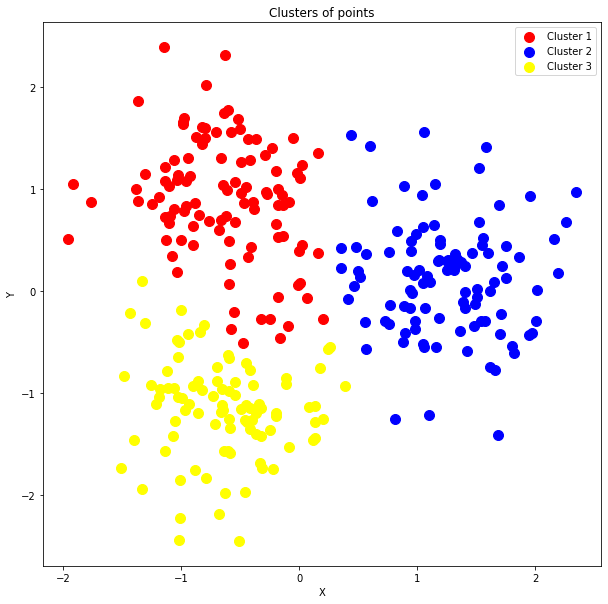

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(X6[y_hc6 == 0, 0], X6[y_hc6 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X6[y_hc6 == 1, 0], X6[y_hc6 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X6[y_hc6 == 2, 0], X6[y_hc6 == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X6[y_hc6 == 3, 0], X6[y_hc6 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X6[y_hc6 == 4, 0], X6[y_hc6 == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [75]:
print(silhouette_score(dataset6,AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset6)))

0.5331004783900316


## Conclusion 

kmeans works best for this data better than hiercheral and dbscan as data is not dense based/spherical (though silhouette score isnt high(0.55) but acceptable

# Dataset 7

In [76]:
dataset7[["x","y"]]=StandardScaler().fit_transform(dataset7)
dataset7.head()

,x,y
0,1.334454,0.178597
1,1.258154,0.147010
2,1.480130,0.155313
3,1.387154,0.022091
4,1.529508,0.268368


## DBSCAN

db7.labels_ = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
db7 = 
 DBSCAN(min_samples=15)


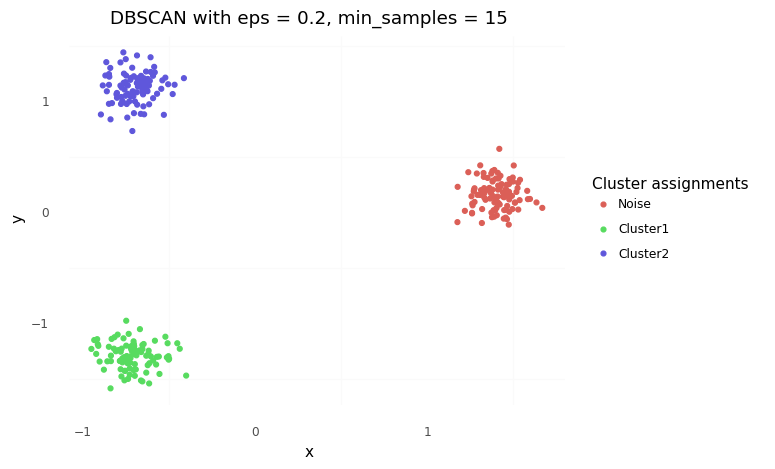

<ggplot: (-9223371894342276324)>

In [77]:
db7 = DBSCAN(eps=0.5, min_samples=15).fit(dataset7)
print("db7.labels_ = \n",db7.labels_)
print("db7 = \n",db7)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db7.labels_)))]
dataset7c=dataset7.copy()
dataset7c["assignments"] = db7.labels_

ggplot(dataset7c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.2, min_samples = 15")
#

In [78]:
print(silhouette_score(dataset7,DBSCAN(eps=0.2, min_samples=15).fit_predict(dataset7)))

0.9136190507340832


## kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


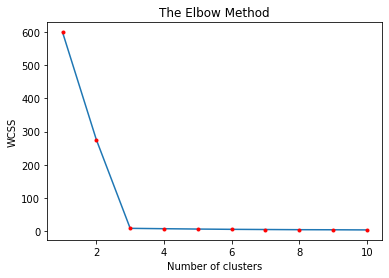

In [79]:
plot_elbow(dataset7)


In [80]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans7 = kmeans.fit_predict(dataset7)
X7 = dataset7.iloc[:, [0, 1]].values

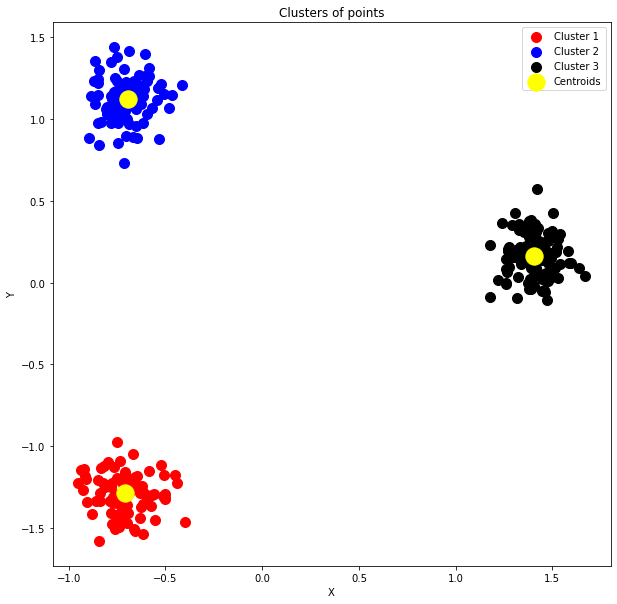

In [81]:
plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,10))
plt.scatter(X7[y_kmeans7 == 0, 0], X7[y_kmeans7 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X7[y_kmeans7 == 1, 0], X7[y_kmeans7 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X7[y_kmeans7 == 2, 0], X7[y_kmeans7 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [82]:
print(silhouette_score(dataset7,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset7)))

0.9136190507340832


## Hiercheral Clustering

In [83]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc7 = hc.fit_predict(X7)

##more code


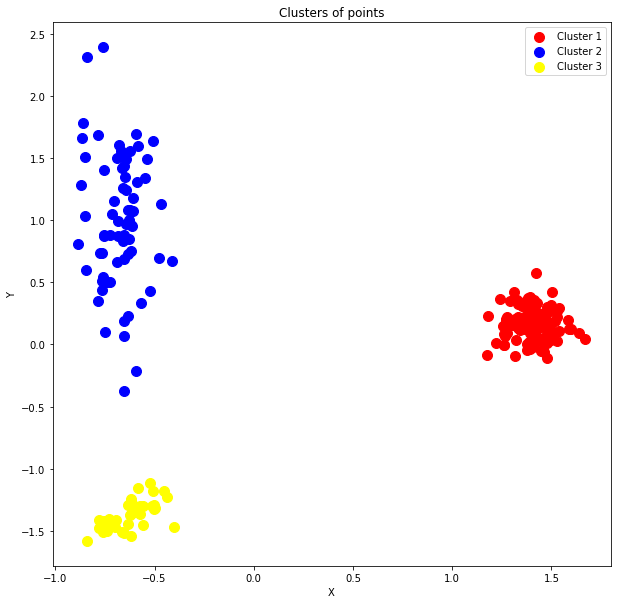

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(X7[y_hc7 == 0, 0], X7[y_hc7 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X7[y_hc7 == 1, 0], X6[y_hc7 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X7[y_hc7 == 2, 0], X7[y_hc7 == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X6[y_hc6 == 3, 0], X6[y_hc6 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X6[y_hc6 == 4, 0], X6[y_hc6 == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [85]:

print(silhouette_score(dataset7,AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset7)))

0.9136190507340832


## Conclusion

kmeans works best for this algorithm and silhoutte score is good in this case and dbscan worked fine also as data is compact and somehow hiercheral gives good results but the previous 2 are better (3 clusters works good)

# Dataet 8

In [86]:
dataset8.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [87]:
dataset8[["x","y"]]=StandardScaler().fit_transform(dataset8)
dataset8.head()

,x,y
0,2.855623,-0.324930
1,2.348953,-0.730035
2,2.231514,-0.600007
3,2.461406,-0.385896
4,2.847342,-0.197032


## DBSCAN

db8.labels_ = 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  

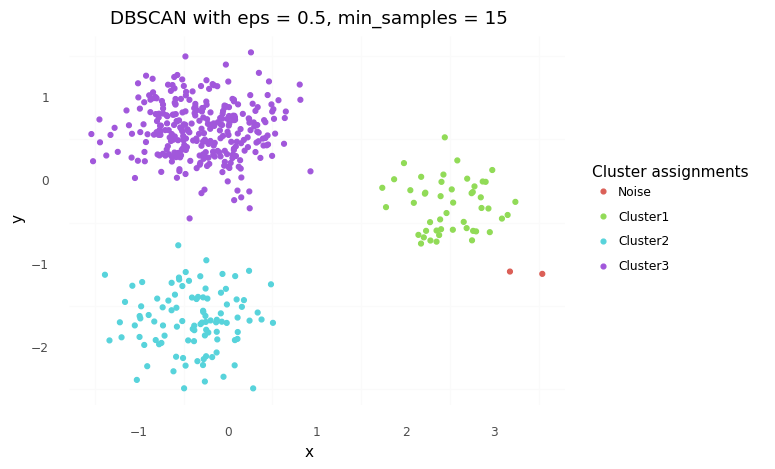

<ggplot: (-9223371894340545884)>

In [88]:
db8 = DBSCAN(eps=0.5, min_samples=15).fit(dataset8)
print("db8.labels_ = \n",db8.labels_)
print("db8 = \n",db8)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db8.labels_)))]
dataset8c=dataset8.copy()
dataset8c["assignments"] = db8.labels_

ggplot(dataset8c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.5, min_samples = 15")
#

In [89]:
print(silhouette_score(dataset8,DBSCAN(eps=0.5, min_samples=15).fit_predict(dataset8)))

0.6714107830551044


## kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


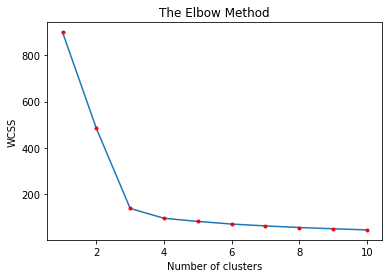

In [90]:
plot_elbow(dataset8)

In [91]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans8 = kmeans.fit_predict(dataset8)
X8 = dataset8.iloc[:, [0, 1]].values

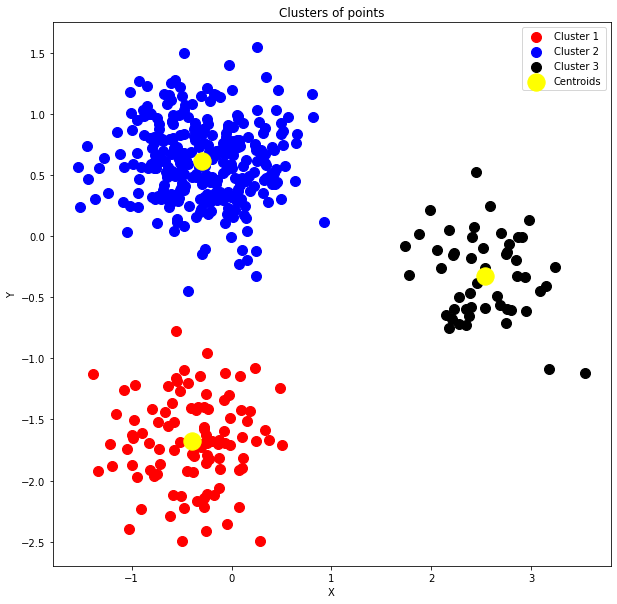

In [92]:
plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,10))
plt.scatter(X8[y_kmeans8 == 0, 0], X8[y_kmeans8 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X8[y_kmeans8 == 1, 0], X8[y_kmeans8 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X8[y_kmeans8 == 2, 0], X8[y_kmeans8 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [93]:
print(silhouette_score(dataset8,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset8)))


0.7043537508086658


## Hiercheral assignment

In [94]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc8 = hc.fit_predict(X8)

##more code


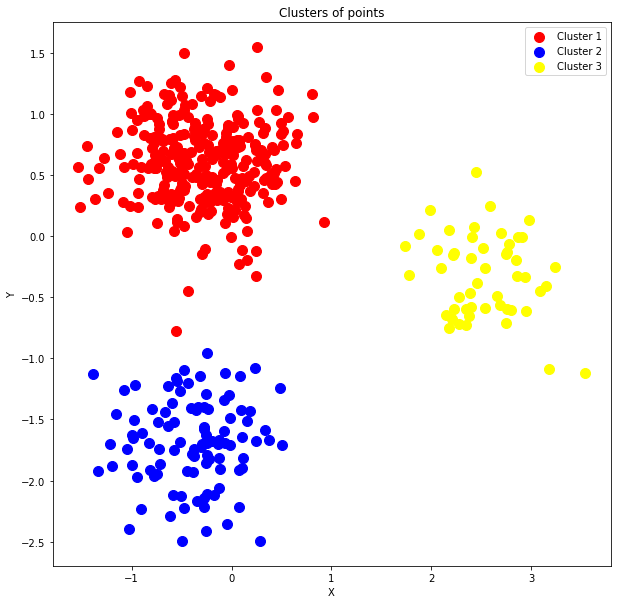

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(X8[y_hc8 == 0, 0], X8[y_hc8 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X8[y_hc8 == 1, 0], X8[y_hc8 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X8[y_hc8 == 2, 0], X8[y_hc8 == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X6[y_hc6 == 3, 0], X6[y_hc6 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X6[y_hc6 == 4, 0], X6[y_hc6 == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [96]:
#plothier(X8,y_hc8)
print(silhouette_score(dataset8,AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(dataset8)))

0.4472449587135249


## Conclusion

Kmeans works fine for this data and dbscan almost works fine and hiercheral clustering works fine all algorithms works fine for 
number of clusters =3

# Dataset 9

In [97]:
dataset9.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [98]:
dataset9[["x","y"]]=StandardScaler().fit_transform(dataset9)

## DBSCAN

db1.labels_ = 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  0  1  1 -1 -1 -1  0  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  0  0 -1  1 -1 -1  1  0 -1  0 -1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  0 -1  1 -1 -1  1  1 -1  1 -1
  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  0  1  1  1 -1  1
  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  0 -1  1  1 -1
  1  1  0 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  0
  0 -1  1 -1  1  1  1 -1  1  1 -1 -1]
db1 = 
 DBSCAN(min_samples=15)


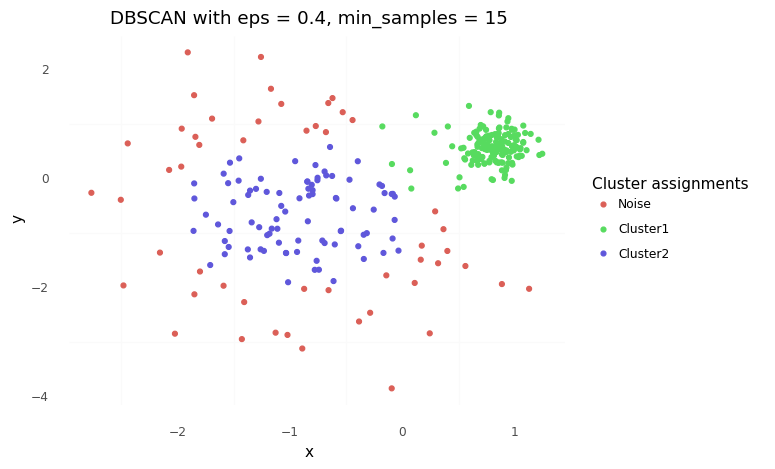

<ggplot: (-9223371894339721448)>

In [99]:
db9 = DBSCAN(eps=0.5, min_samples=15).fit(dataset9)
print("db1.labels_ = \n",db9.labels_)
print("db1 = \n",db9)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db9.labels_)))]
dataset9c=dataset9.copy()
dataset9c["assignments"] = db9.labels_

ggplot(dataset9c, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank()) \
+ labs(title = "DBSCAN with eps = 0.4, min_samples = 15")


In [100]:
print(silhouette_score(dataset9,DBSCAN(eps=0.5, min_samples=15).fit_predict(dataset9)))

0.523629650344957


## kmeans

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


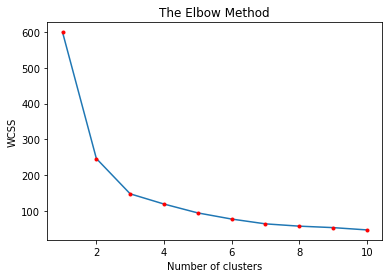

In [101]:
plot_elbow(dataset9)


In [102]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans9 = kmeans.fit_predict(dataset9)
X9 = dataset9.iloc[:, [0, 1]].values
#plotkmeans(X9,y_hc)
#more code


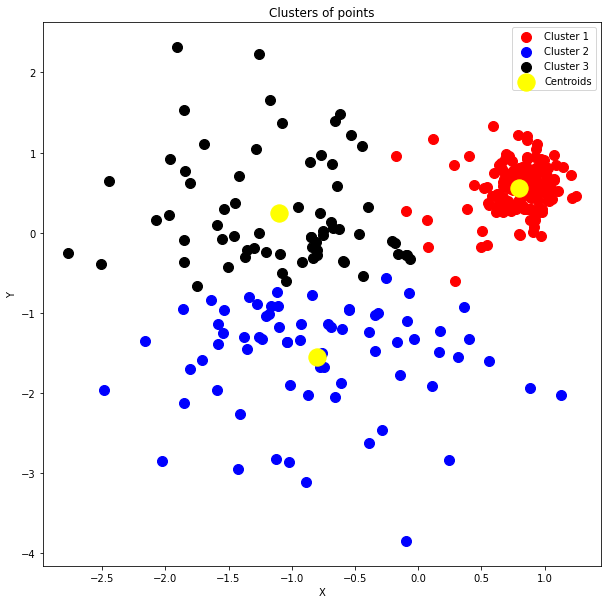

In [103]:
plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,10))
plt.scatter(X9[y_kmeans9 == 0, 0], X9[y_kmeans9 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X9[y_kmeans9 == 1, 0], X9[y_kmeans9 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X9[y_kmeans9 == 2, 0], X9[y_kmeans9 == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
#print(silhouette_score(dataset5,KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(dataset5)))


## hiercheral assignment

In [104]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc9 = hc.fit_predict(X9)

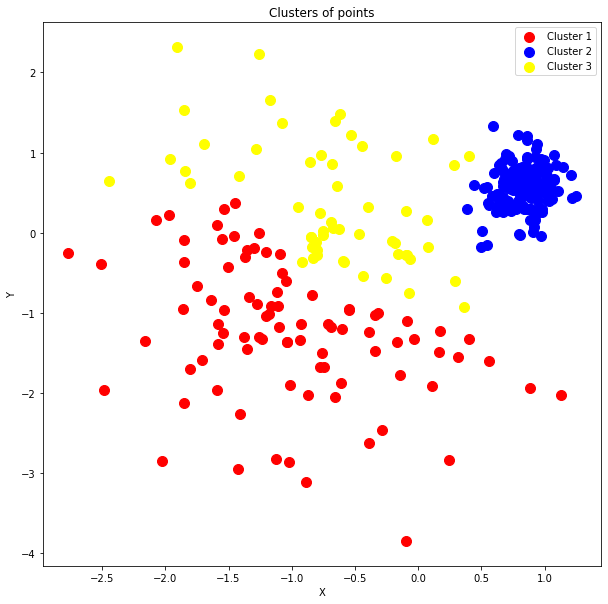

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(X9[y_hc9 == 0, 0], X9[y_hc9 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X9[y_hc9 == 1, 0], X9[y_hc9 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X9[y_hc9 == 2, 0], X9[y_hc9 == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
#plt.scatter(X6[y_hc6 == 3, 0], X6[y_hc6 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(X6[y_hc6 == 4, 0], X6[y_hc6 == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## conclusion

the algorithms work fine in the foloowing order :
    1) kmeans (best for c=3)
    2) hiercheral clustering 
    3)DBSCAN